In [ ]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
import joblib
from scipy.special import softmax
import sasc.config
import numpy as np
from collections import defaultdict
from copy import deepcopy
import pandas as pd
from sasc.modules.fmri_module import convert_module_num_to_voxel_num

In [ ]:
# load data and corresponding resps
pilot_data_dir = '/home/chansingh/mntv1/deep-fMRI/story_data/20230504'
resp_np_files = os.listdir(pilot_data_dir)
resps_dict = {
    k: np.load(join(pilot_data_dir, k))
    for k in tqdm(resp_np_files)
}

story_mapping = {
    "uts02_pilot_gpt4_mar28___ver=v4_noun___seed=3": 'GenStory2_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v5_noun___seed=4": 'GenStory6_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v5_noun___seed=1": 'GenStory4_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v5_noun___seed=2": 'GenStory5_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v4_noun___seed=4": 'GenStory3_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v4_noun___seed=1": 'GenStory1_resps.npy',
}

STORIES_DIR = join(sasc.config.RESULTS_DIR, 'pilot_v1')
story_names = story_mapping.keys() # os.listdir(STORIES_DIR)

story_data = defaultdict(list)
for story_name in story_names:
    story_data['timing'].append(pd.read_csv(join(STORIES_DIR, story_name, 'timings_processed.csv')))
    story_data['story_name_original'].append(story_name)
    story_data['story_name_new'].append(story_mapping[story_name])
    story_data['story_text'].append(open(join(STORIES_DIR, story_name, 'story.txt'), 'r').read())    
    story_data['rows'].append(pd.read_csv(join(STORIES_DIR, story_name, 'rows.csv')))

    # print(story_name, story_data['timing'][-1]['time_running'].round(1).max())

# Look at heatmaps

len 19
len 21
len 22
len 24
len 24
len 23
len 21
len 25
len 23
len 23
len 23
len 23
len 22
len 25
len 26
len 23
len 25


/tmp/ipykernel_386597/1046459469.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw["voxel_num"] = rw.apply(


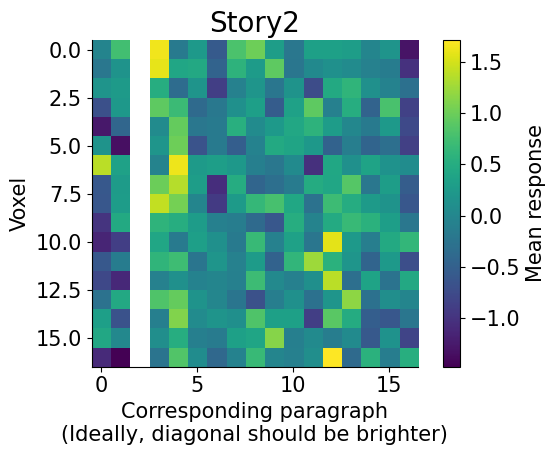

len 19
len 29
len 29
len 29
len 28
len 25
len 30
len 28
len 27
len 28
len 27
len 31
len 29
len 26
len 31
len 31
len 31


/tmp/ipykernel_386597/1046459469.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw["voxel_num"] = rw.apply(


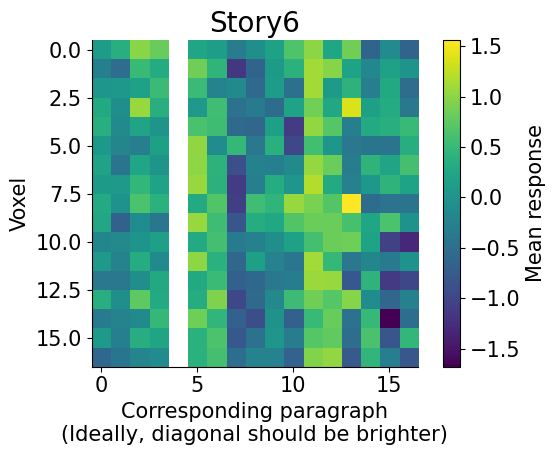

len 14
len 22
len 25
len 19
len 26
len 24
len 23
len 25
len 23
len 23
len 25
len 27
len 28
len 28
len 26
len 29
len 26


/tmp/ipykernel_386597/1046459469.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw["voxel_num"] = rw.apply(


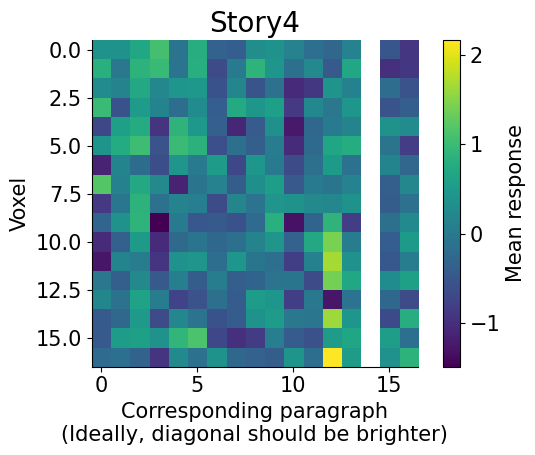

len 15
len 19
len 27
len 25
len 28
len 23
len 24
len 24
len 26
len 26
len 26
len 26
len 26
len 26
len 24
len 23
len 26


/tmp/ipykernel_386597/1046459469.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw["voxel_num"] = rw.apply(


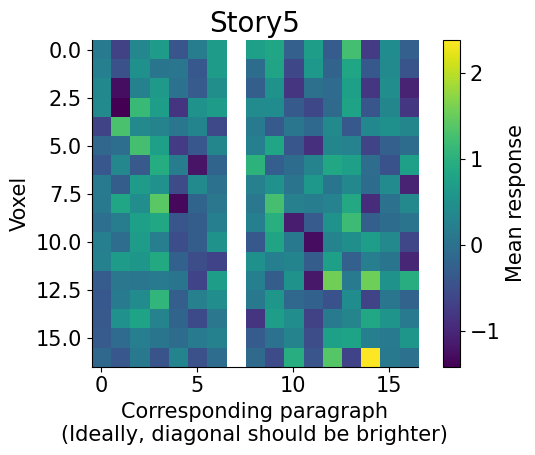

len 15
len 20
len 20
len 19
len 19
len 18
len 19
len 20
len 18
len 20
len 20
len 21
len 20
len 17
len 21
len 21
len 19


/tmp/ipykernel_386597/1046459469.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw["voxel_num"] = rw.apply(


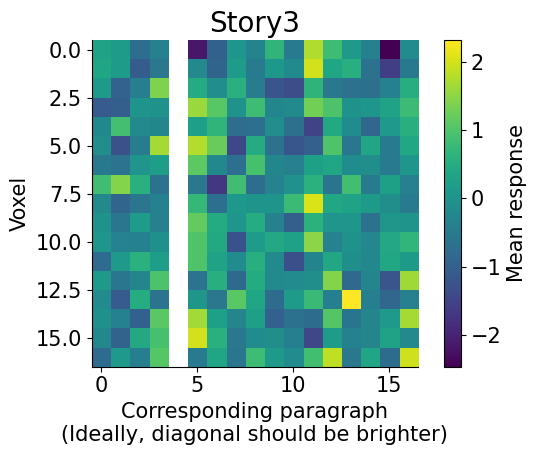

len 18
len 25
len 24
len 23
len 23
len 26
len 23
len 25
len 27
len 28
len 27
len 30
len 29
len 29
len 30
len 28
len 30


/tmp/ipykernel_386597/1046459469.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw["voxel_num"] = rw.apply(


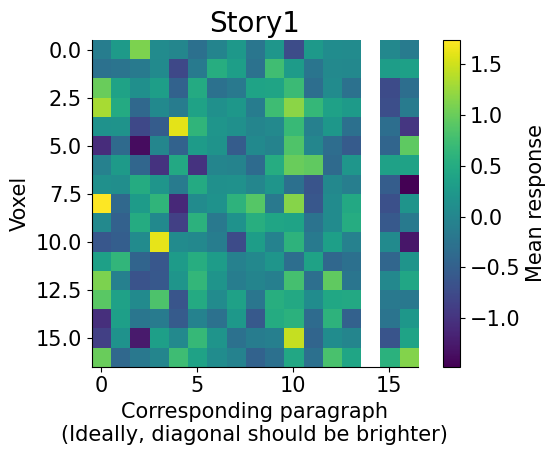

In [194]:
mats = []

for story_num in [0, 1, 2, 3, 4, 5]:
    rows = story_data["rows"][story_num]
    rw = rows[
        [
            "expl",
            "module_num",
            "top_explanation_init_strs",
            "subject",
            "fmri_test_corr",
            "top_score_synthetic",
            "roi_anat",
            "roi_func",
        ]
    ]
    rw["voxel_num"] = rw.apply(
        lambda row: convert_module_num_to_voxel_num(row["module_num"], row["subject"]),
        axis=1,
    )
    paragraphs = story_data["story_text"][story_num].split("\n\n")
    assert len(paragraphs) == len(rw), (len(paragraphs), len(rw))

    # get start times, end times for each paragraph
    timing = story_data["timing"][story_num]
    idx = 0
    start_times = []
    end_times = []
    for para in paragraphs:
        words = para.split()
        start_times.append(timing["time_running"][idx])
        for word in words:
            assert timing["word"][idx] == word, (idx, timing["word"][idx], word)
            idx += 1
            if idx == len(timing):
                break
        end_times.append(timing["time_running"][idx - 1])
    start_times = (np.array(start_times) // 2).astype(int)
    end_times = (np.array(end_times) // 2).astype(int)

    # get resp
    resp = resps_dict[story_data["story_name_new"][story_num]].T  # (voxels, time)
    resp = resp[rw["voxel_num"].values]

    
    mat = np.zeros((resp.shape[0], len(start_times)))
    for i in range(len(start_times)):
        OFFSET = 8
        print("len", end_times[i] - start_times[i])
        resp_paragraph = resp[:, start_times[i] : end_times[i]]
        while resp_paragraph.shape[1] <= 2 * OFFSET:
            OFFSET -= 1
        mat[:, i] = resp_paragraph[:, OFFSET : - OFFSET].mean(axis=1)

        # find the middle 3 values of resp_paragraph
        # # # mid = resp_paragraph.shape[1] // 2
        # # resp_middle = resp_paragraph[:, mid - 1 : mid + 2]
        # mat[:, i] = resp_middle.mean(axis=1)

    # calculate stats
    # make sure to ignore first column

    # visualize
    mat[
        :, 0
    ] = np.nan  # for now just set first column to 0 (really should drop it properly)
    # mat = softmax(mat, axis=0)

    args = np.argsort(rw["voxel_num"].values)
    # print('args', args)
    mat = mat[args, :][:, args]
    mats.append(deepcopy(mat))

    plt.imshow(mat)
    plt.colorbar(label="Mean response")
    plt.xlabel("Corresponding paragraph\n(Ideally, diagonal should be brighter)")
    plt.ylabel("Voxel")
    plt.title(f"{story_data['story_name_new'][story_num][3:-10]}")
    plt.show()
expls = rw.sort_values(by="voxel_num")["expl"].values

In [195]:
mats = np.array(mats) # (6, 17, 17)
m = np.nanmean(mats, axis=0)
n = m.shape[0]
diag_means = np.diag(m)
diag_mean = np.nanmean(diag_means)

# get mean of each row excluding the diagonal
off_diag_means = m.mean(axis=1) - (diag_means / n)
off_diag_mean = off_diag_means.mean()

<>:13: DeprecationWarning: invalid escape sequence '\s'
<>:13: DeprecationWarning: invalid escape sequence '\s'
/tmp/ipykernel_386597/2964013015.py:13: DeprecationWarning: invalid escape sequence '\s'
  plt.ylabel('Mean voxel response ($\sigma_f$)')


mean 0.31312458579370267


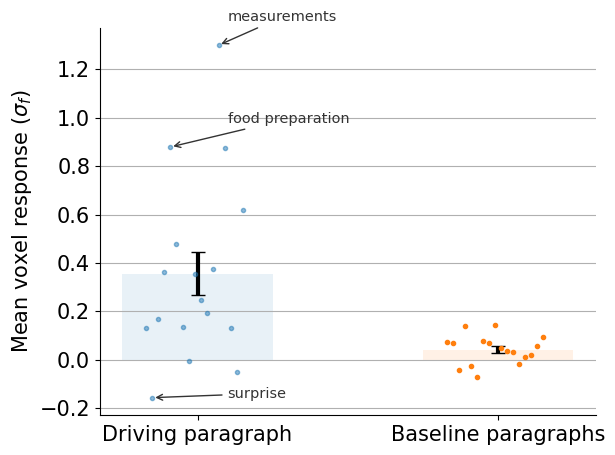

In [201]:
x = np.arange(n) - n / 2

plt.bar(1, diag_mean, width=0.5, label='Diagonal', alpha=0.1, color='C0')
plt.errorbar(1, diag_mean, yerr=diag_means.std() / np.sqrt(len(diag_means)), fmt='.', label='Diagonal', ms=0, color='black', elinewidth=3, capsize=5, lw=1)
plt.plot(1 + x/50, diag_means, '.', color='C0', alpha=0.5)


plt.bar(2, off_diag_mean, width=0.5, label='Off-diagonal', alpha=0.1, color='C1')
plt.errorbar(2, off_diag_mean, yerr=off_diag_means.std() / np.sqrt(len(off_diag_means)), fmt='.', label='Diagonal', ms=0, color='black', elinewidth=3, capsize=5)
plt.plot(2 + x/50, off_diag_means, '.', color='C1')

plt.xticks([1, 2], ['Driving paragraph', 'Baseline paragraphs'])
plt.ylabel('Mean voxel response ($\sigma_f$)')
plt.grid(axis='y')

# annotate the point with the highest mean
kwargs = dict(
    arrowprops=dict(arrowstyle='->', color='#333'), fontsize='x-small', color='#333'
)
idx = np.argmax(diag_means)
plt.annotate(f"{expls[idx]}", (1 + x[idx]/50, diag_means[idx]), xytext=(1.1, diag_means[idx] + 0.1), **kwargs)

# annotate the point with the second highest mean
idx = np.argsort(diag_means)[-2]
plt.annotate(f"{expls[idx]}", (1 + x[idx]/50, diag_means[idx]), xytext=(1.1, diag_means[idx] + 0.1), **kwargs)

# annotate the point with the lowest mean
idx = np.argmin(diag_means)
plt.annotate(f"{expls[idx]}", (1 + x[idx]/50, diag_means[idx]), xytext=(1.1, diag_means[idx]), **kwargs)
plt.tight_layout()
print('mean', diag_mean - off_diag_mean)
plt.savefig('../results/pilot_means.pdf')

In [ ]:
# story-level differences
for i in range(len(mats)):
    m = mats[i]
    print('diag', np.diag(m).mean().round(2), 'off', np.mean(m[~np.eye(m.shape[0], dtype=bool)]).round(3))

In [ ]:
for i in range(resp.shape[0]):
    plt.plot(resp[i])